In [1]:
from LassoLayer import LassoLayer
import pandas as pd

In [2]:
df = pd.read_pickle('titanic.pkl')
input_df = df.drop('Survived', axis=1)
output_df = df['Survived']
input_df.shape

(891, 18)

In [10]:
# basic model from https://www.kaggle.com/vincentlugat/titanic-neural-networks-keras-81-8
# with the lasso input layer added to illustrate the concept

# all I did was add the Lasso Layer for illustration purposes
from keras.layers import Input, Dense, LeakyReLU, Layer, Dropout
from keras.models import Model
import keras.backend as K
from keras import regularizers
from keras.losses import categorical_crossentropy, binary_crossentropy, hinge, squared_hinge
from keras import backend as K
from keras.layers import Layer
from keras.optimizers import Adam
import tensorflow as tf

inputs = Input(shape=(input_df.shape[1],))
lasso = LassoLayer(input_df.shape[1], kernel_regularizer=tf.keras.regularizers.l1(0.012))
lasso_layer = lasso(inputs)
dense1 = Dense(13, activation='relu')(lasso_layer)
dropout = Dropout(0.2)(dense1)
dense2 = Dense(8, activation='relu')(dropout)
# this was added in addition to the original model
# for the purpose of the embedding
# the name is specified so we can build an intermediate model to
# extract the output
dense3 = Dense(2, activation='relu', name='embedding')(dense2)
output = Dense(1, activation='sigmoid')(dense3)
model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
model.fit(input_df, output_df,epochs = 20, batch_size = 10)

Epoch 1/20
90/90 [==============================] - 0s 5ms/step - loss: 0.6758 - accuracy: 0.6162
Epoch 2/20
90/90 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6162
Epoch 3/20
90/90 [==============================] - 0s 4ms/step - loss: 0.6320 - accuracy: 0.6162
Epoch 4/20
90/90 [==============================] - 0s 5ms/step - loss: 0.6106 - accuracy: 0.6162
Epoch 5/20
90/90 [==============================] - 0s 5ms/step - loss: 0.5908 - accuracy: 0.6162
Epoch 6/20
90/90 [==============================] - 1s 6ms/step - loss: 0.5795 - accuracy: 0.7228
Epoch 7/20
90/90 [==============================] - 0s 5ms/step - loss: 0.5717 - accuracy: 0.7497
Epoch 8/20
90/90 [==============================] - 1s 6ms/step - loss: 0.5648 - accuracy: 0.7834
Epoch 9/20
90/90 [==============================] - 0s 4ms/step - loss: 0.5579 - accuracy: 0.7868
Epoch 10/20
90/90 [==============================] - 0s 6ms/step - loss: 0.5508 - accuracy: 0.7935
Epoch 11/20
90/90 [

In [11]:
model.summary()
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('embedding').output)
embedding = intermediate_layer_model.predict(input_df)

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 18)]              0         
_________________________________________________________________
lasso_layer_5 (LassoLayer)   (None, 18)                18        
_________________________________________________________________
dense_15 (Dense)             (None, 13)                247       
_________________________________________________________________
dropout_5 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 112       
_________________________________________________________________
embedding (Dense)            (None, 2)                 18        
_________________________________________________________________
dense_17 (Dense)             (None, 1)               

,column,weights
0,Sex,-0.466056
1,Pclass_1,0.164968
2,Pclass_3,-0.242950
3,Family_Survival_0.0,-0.024305
4,Family_Survival_1.0,0.274014


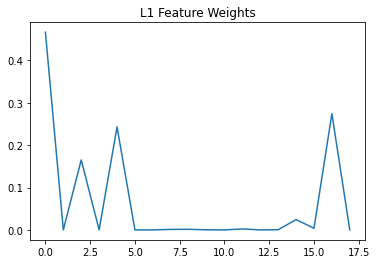

In [12]:
import matplotlib.pyplot as plt
import numpy as np
weights = lasso.get_weights()
plt.plot(np.abs(weights[0][0]))
plt.title('L1 Feature Weights')

colname = input_df.columns[np.abs(weights[0][0]) > 0.01]
colweights = weights[0][0][np.abs(weights[0][0]) > 0.01]

features = pd.DataFrame({'column': colname, 'weights': colweights})
features

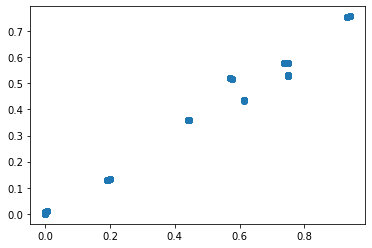

In [17]:
plt.scatter(embedding[:,0], embedding[:,1])